# General

In [1]:

# imports

import os

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


In [2]:
# Folder paths
origin_folder = os.getcwd()
print(origin_folder)
mes_folder_1 = origin_folder + r"\kinetics_data\part 1"
mes_folder_2 = origin_folder + r"\kinetics_data\part 2"
mes_folder_3 = origin_folder + r"\kinetics_data\part 3"


c:\Users\yaniv\Yehonathan TAU\PhyChemLab


In [33]:
# Functions
def get_data(file_path, cut = [300,1200]):
    '''
    take raw data (.SSM) and transform it to pd data frame 
    '''
    df = pd.read_csv(file_path, delimiter = '\t', names = ['Wavelength', 'Intensity'], header = 0 )
    return df[(cut[0] < df['Wavelength']) & (df['Wavelength'] < cut[1])]

def culc_absorbance(I, I0,A = None):
    '''
    culculate absorbance dataframe from intensity
    '''
    A = pd.DataFrame()
    A['Absorbance'] = -np.log(I['Intensity']/I0['Intensity'])
    A['Wavelength'] = I['Wavelength']

    return A

def get_concentration(file_name):
    '''
    get concentration from file name
    '''
    return float(file_name.split('_')[0]) # file name is like 0.1_M.SSM

def culc_molar_absorption_coefficient(slope, error, l = 1):
    '''
    culculate molar absorption coefficient from absorbance and concentration
    '''
    return slope / l, error / l

def linear_func(x,a0,a1): # define the modle fucntion - linear
    return a1 * x + a0

def linear_fit(x,y):
    '''
    fit linear function
    '''
    popt, pcov = curve_fit(linear_func, x, y)
    return popt, np.sqrt(np.diag(pcov))




# Part 1:  Beer-Lambert's Law Validation

Current Directory: c:\Users\yaniv\Yehonathan TAU\PhyChemLab\kinetics_data\part 1


c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc,

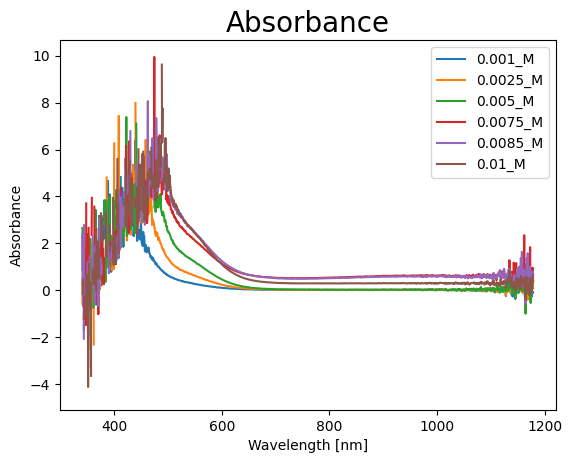

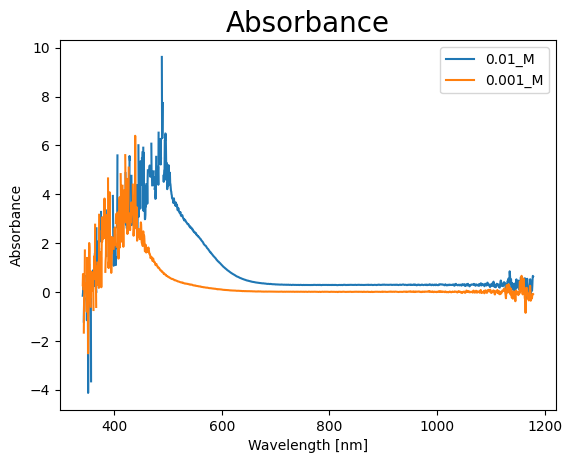

In [48]:
# Change directory to mes_folder_1 if not already there
if os.getcwd() != mes_folder_1:
    os.chdir(mes_folder_1)
print("Current Directory:", os.getcwd())

# define I0
dark = get_data(r"dark.SSM")
I0 = get_data(r"blank.SSM")
I0['Intensity'] = I0['Intensity'] - dark['Intensity']

# get absobance data frame
Absorbabce_all = pd.DataFrame()
Absorbabce_all['Wavelength'] = I0['Wavelength']
for file in os.listdir('.'):
    if file.endswith(".SSM") and file != 'I0.SSM' and file != 'dark.SSM' and file != 'blank.SSM':
        data = get_data(file)
        data['Intensity'] = data['Intensity'] - dark['Intensity']
        # plt.plot(data['Wavelength'], data['Intensity'], label = file)
        C = get_concentration(file)
        Absorbabce_all[str(C) + '_M'] = culc_absorbance(data, I0)['Absorbance']

        plt.plot(Absorbabce_all['Wavelength'], Absorbabce_all[str(C) + '_M'], label = str(C) + '_M')

plt.legend()
plt.title('Absorbance', fontsize = 20)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.show()
plt.plot(Absorbabce_all['Wavelength'], Absorbabce_all['0.01_M'], label = '0.01_M')
plt.plot(Absorbabce_all['Wavelength'], Absorbabce_all['0.001_M'], label = '0.001_M')
plt.legend()
plt.title('Absorbance', fontsize = 20)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Absorbance')
plt.show()
# display(Absorbabce_all)

In [49]:
# change data frame to more readable format

# Create a dictionary to hold the data for each wavelength
data_dict = {'Concentration': [get_concentration(file) for file in os.listdir('.') if file.endswith(".SSM") and file != 'I0.SSM' and file != 'dark.SSM' and file != 'blank.SSM']}
for wavelength in Absorbabce_all['Wavelength']:
    data_dict[str(wavelength)] = Absorbabce_all[Absorbabce_all['Wavelength'] == wavelength].drop(columns='Wavelength').values[0]

# Use pd.concat to join all columns at once
Absorbabce_all2 = pd.concat([pd.DataFrame(data_dict)], axis=1)

# display(Absorbabce_all2)

$$
A = - \log \left(I/I_0\right)
$$

$$
A = \varepsilon c l
$$

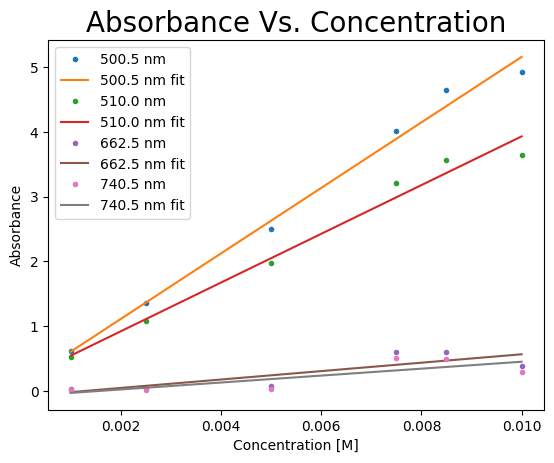

Molar Absorption Coefficients ε [M^-1 cm^-1]:


,wavelength [nm],molar_absorption,molar_absorption_err
0,500.5,506.070647,24.334107
1,510.0,376.452409,27.001475
2,662.5,64.991287,21.347257
3,740.5,53.551645,20.400773


In [51]:
# Plot the data and extract the molar absorption coefficient for each wavelength

wavelengths_list = [500.5,510.0,662.5, 740.5] # replace with the wavelengths you want to use

l = 1 # in cm - optic path length
if l is None:
    raise ValueError("Optic path length (l) must be defined.")

molar_absorption = {'wavelength [nm]': wavelengths_list, 'molar_absorption': [], 'molar_absorption_err': []}
for wavelength in wavelengths_list:
    # Fit a linear function to the data
    fit = linear_fit(Absorbabce_all2['Concentration'], Absorbabce_all2[str(wavelength)])
    plt.plot(Absorbabce_all2['Concentration'], Absorbabce_all2[str(wavelength)], '.', label=str(wavelength) + ' nm')
    plt.plot(Absorbabce_all2['Concentration'], linear_func(Absorbabce_all2['Concentration'], *fit[0]), label=str(wavelength) + ' nm fit')

    # Calculate molar absorption coefficient
    epsilon = culc_molar_absorption_coefficient(fit[0][1], fit[1][1], l) # in M^-1 cm^-1
    molar_absorption['molar_absorption'].append(epsilon[0])
    molar_absorption['molar_absorption_err'].append(epsilon[1]) 

plt.legend()
plt.xlabel('Concentration [M]')
plt.ylabel('Absorbance')
plt.title('Absorbance Vs. Concentration', fontsize=20)
plt.show()

molar_absorption_df = pd.DataFrame(molar_absorption)
print('Molar Absorption Coefficients ε [M^-1 cm^-1]:')
display(molar_absorption_df)

# Part 2: Determination of Optimal Acid:Acetone:Iodide Ratio


# Part 3: Finding the Reaction Order for Each Component

In [ ]:
# if os.getcwd() != mes_folder_3:
#     os.chdir(mes_folder_3)
# print("Current Directory:", os.getcwd())